In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
transaction = pd.read_csv("Transactions.csv")
data = pd.merge(customers,transaction,on = 'CustomerID')
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [3]:
#transaction.groupby('CustomerID')['TotalValue'].agg(['count','min','max','mean','sum'])
transaction_details = transaction.groupby('CustomerID').agg(Total_Spent = ('TotalValue','sum'), 
                    Transaction_count = ('TransactionID','count'),Avg_transaction = ('TotalValue','mean'),
                    First_Purchase = ('TransactionDate','min'),Last_Purchase = ('TransactionDate','max')).reset_index()
transaction_details                    

,CustomerID,Total_Spent,Transaction_count,Avg_transaction,First_Purchase,Last_Purchase
0,C0001,3354.52,5,670.904000,2024-01-19 03:12:55,2024-11-02 17:04:16
1,C0002,1862.74,4,465.685000,2024-02-28 07:44:21,2024-12-03 01:41:41
2,C0003,2725.38,4,681.345000,2024-02-18 02:50:37,2024-08-24 18:54:04
3,C0004,5354.88,8,669.360000,2024-02-28 10:16:35,2024-12-23 14:13:52
4,C0005,2034.24,3,678.080000,2024-03-15 04:08:59,2024-11-04 00:30:22
...,...,...,...,...,...,...
194,C0196,4982.88,4,1245.720000,2024-08-06 14:37:15,2024-12-15 03:43:35
195,C0197,1928.65,3,642.883333,2024-01-13 04:52:09,2024-12-27 18:20:31
196,C0198,931.83,2,465.915000,2024-09-29 16:14:59,2024-10-04 18:31:12
197,C0199,1979.28,4,494.820000,2024-08-17 12:06:08,2024-10-26 00:01:58


In [4]:
customer_data = pd.merge(data,transaction_details,on = 'CustomerID')
customer_data = customer_data.drop(columns = ['CustomerID'])
customer_data.head()

,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Total_Spent,Transaction_count,Avg_transaction,First_Purchase,Last_Purchase
0,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3354.52,5,670.904,2024-01-19 03:12:55,2024-11-02 17:04:16
1,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,3354.52,5,670.904,2024-01-19 03:12:55,2024-11-02 17:04:16
2,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,3354.52,5,670.904,2024-01-19 03:12:55,2024-11-02 17:04:16
3,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,3354.52,5,670.904,2024-01-19 03:12:55,2024-11-02 17:04:16
4,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,3354.52,5,670.904,2024-01-19 03:12:55,2024-11-02 17:04:16


In [5]:
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
customer_data['First_Purchase'] = pd.to_datetime(customer_data['First_Purchase'])
customer_data['Last_Purchase'] = pd.to_datetime(customer_data['Last_Purchase'])
enc = OrdinalEncoder(categories=[customer_data['CustomerName'].unique()],dtype=int)
customer_data['CustomerName'] = enc.fit_transform(customer_data[['CustomerName']])
enc1 = OrdinalEncoder(categories=[customer_data['Region'].unique()],dtype=int)
customer_data['Region'] = enc1.fit_transform(customer_data[['Region']])

In [6]:
customer_data.tail()

,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Total_Spent,Transaction_count,Avg_transaction,First_Purchase,Last_Purchase
995,198,1,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,4758.6,5,951.72,2024-04-27 19:06:20,2024-12-11 03:05:50
996,198,1,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,4758.6,5,951.72,2024-04-27 19:06:20,2024-12-11 03:05:50
997,198,1,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,4758.6,5,951.72,2024-04-27 19:06:20,2024-12-11 03:05:50
998,198,1,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,4758.6,5,951.72,2024-04-27 19:06:20,2024-12-11 03:05:50
999,198,1,2023-06-11,T00889,P064,2024-10-03 04:33:16,3,1357.26,452.42,4758.6,5,951.72,2024-04-27 19:06:20,2024-12-11 03:05:50


In [7]:
sc = StandardScaler()
sc_data = sc.fit_transform(customer_data.select_dtypes(include=np.number))

In [40]:
cluster_range = range(2,11)
db_scores = []
silhouette_scores = []

for n in cluster_range:
    kmeans = KMeans(n_clusters = n,random_state=12)
    cluster_labels = kmeans.fit_predict(sc_data)

    db_score = davies_bouldin_score(sc_data,cluster_labels).round(4).tolist()
    silhouette_avg = silhouette_score(sc_data,cluster_labels).round(4).tolist()

    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

In [50]:
display(f'Db Scores        - {db_scores}')
print(f'Silhouette Scores - {silhouette_scores}')

'Db Scores        - [1.8432, 1.8604, 1.8157, 1.8328, 1.783, 1.7455, 1.7166, 1.7378, 1.6562]'

Silhouette Scores - [0.1949, 0.1663, 0.1566, 0.1484, 0.1468, 0.1457, 0.1491, 0.1408, 0.148]


In [ ]:
optimal_clusters = cluster_range[np.argmin(db_scores)]
final_kmeans = KMeans(n_clusters=optimal_clusters,random_state=12)
final_labels = final_kmeans.fit_predict(sc_data)

In [10]:
pca = PCA(n_components=2)
pca_feature = pca.fit_transform(sc_data)

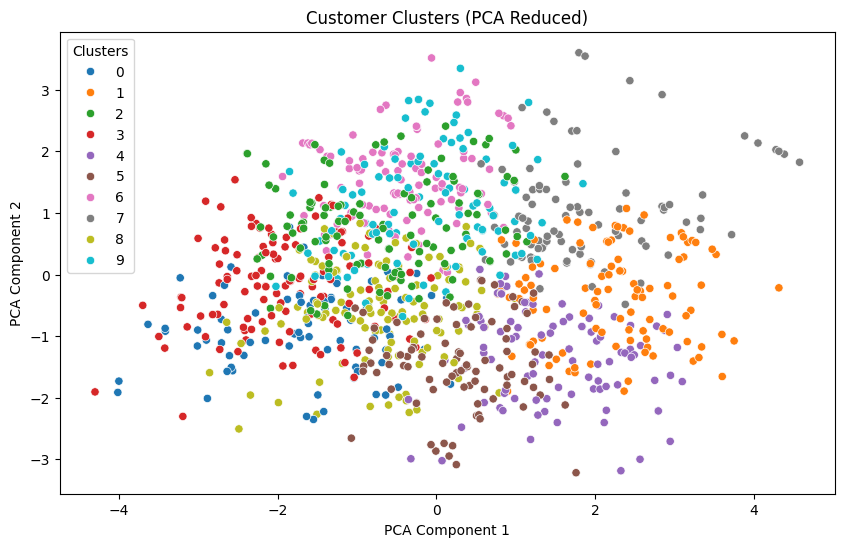

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_feature[:, 0], y=pca_feature[:, 1], hue=final_labels, palette='tab10')
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()

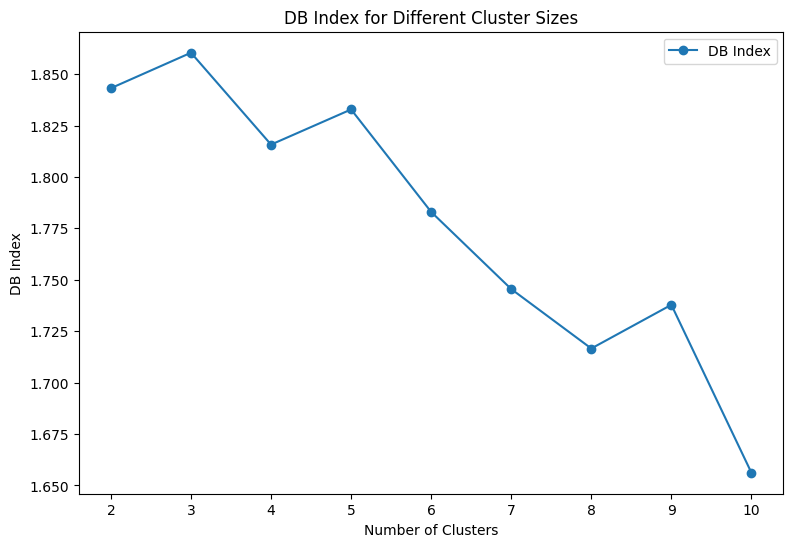

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o', label='DB Index')
plt.title('DB Index for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.legend()
plt.show()

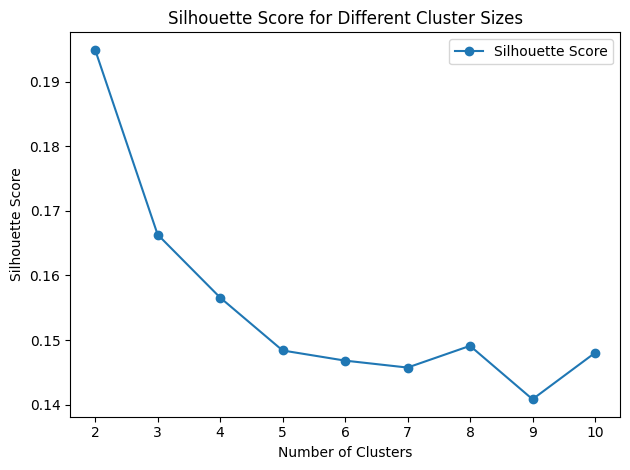

In [13]:
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
print(f'Optimal Number of Clusters: {optimal_clusters}')
print(f'Davies-Bouldin Index for Optimal Clusters: {min(db_scores):.2f}')

Optimal Number of Clusters: 10
Davies-Bouldin Index for Optimal Clusters: 1.66


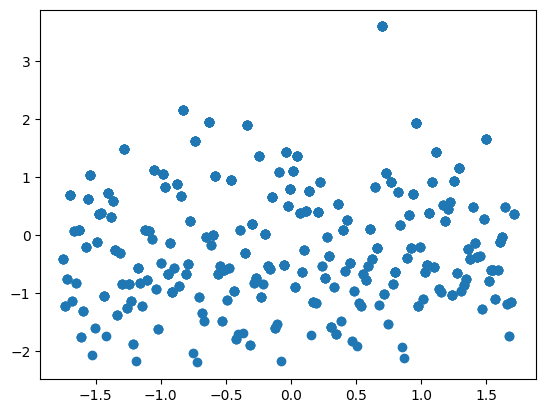

In [16]:
plt.scatter(sc_data[:,0],sc_data[:,5])
plt.show()

In [17]:
dbscan = DBSCAN()
dbscan.fit(sc_data)

DBSCAN()

In [19]:
db_labels = dbscan.labels_

In [20]:
kmeans = KMeans(random_state=12)
kmeans.fit(sc_data)

KMeans(random_state=12)

In [21]:
km_labels = kmeans.labels_
len(sc_data[:,2])

1000

In [22]:
len(sc_data[:,0])

1000

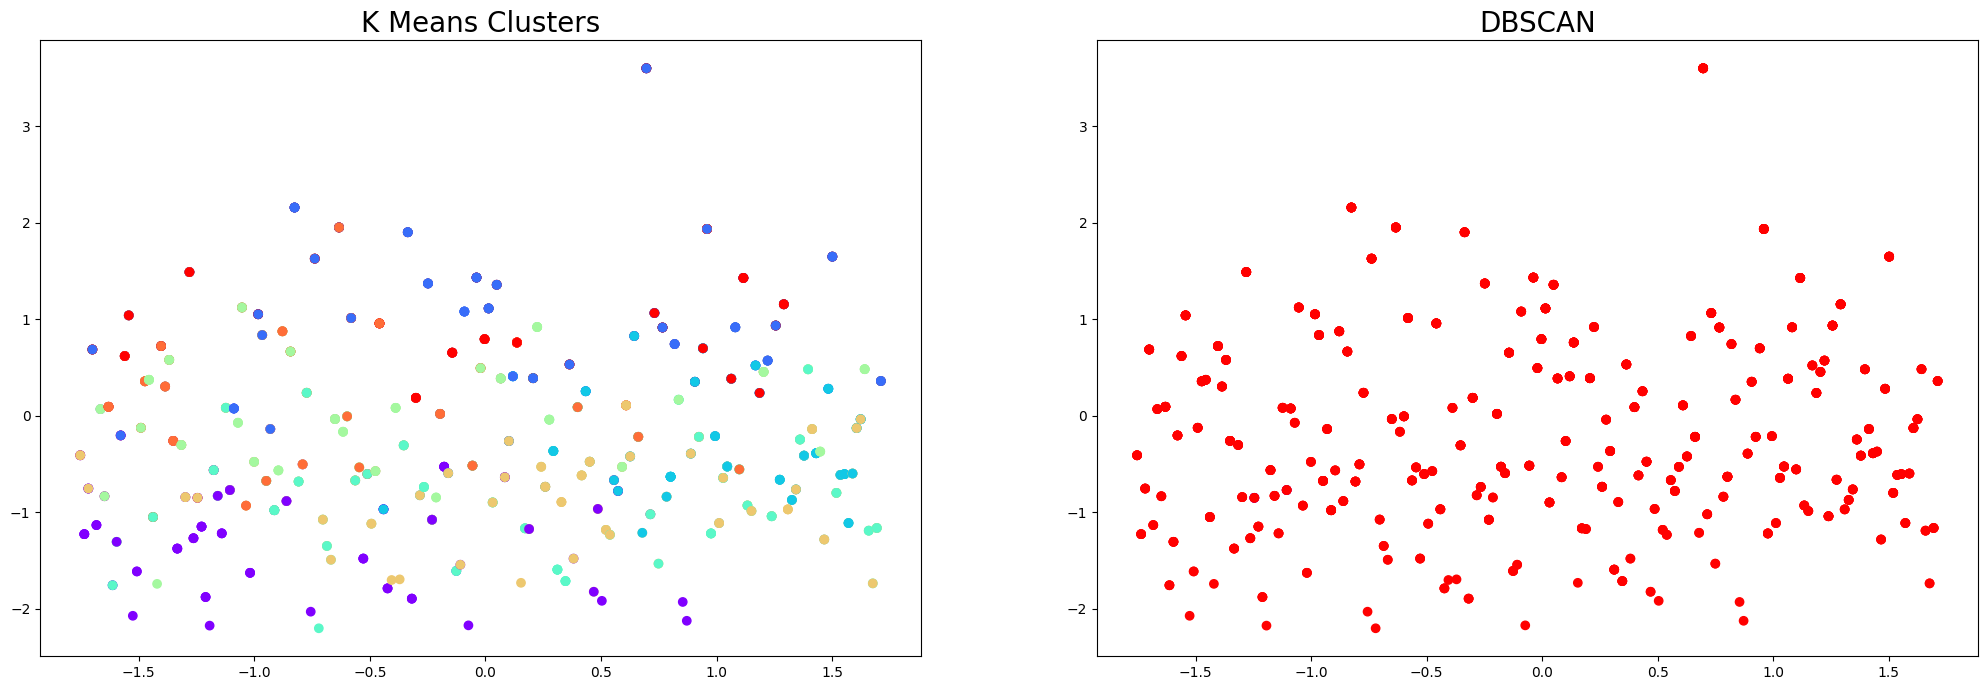

In [23]:
f, ax = plt.subplots(1,2,figsize = (25,8))
ax[0].scatter(sc_data[:,0],sc_data[:, 5],c = km_labels,cmap = 'rainbow')
ax[0].set_title('K Means Clusters',size = 20)
ax[1].scatter(sc_data[:,0],sc_data[:,5],c = db_labels,cmap = 'rainbow_r')
ax[1].set_title("DBSCAN",size = 20)
plt.show()